## 赛题
### 一、赛题数据

赛题以新闻数据为赛题数据，数据集报名后可见并可下载。赛题数据为新闻文本，并按照字符级别进行匿名处理。整合划分出14个候选分类类别：财经、彩票、房产、股票、家居、教育、科技、社会、时尚、时政、体育、星座、游戏、娱乐的文本数据。

赛题数据由以下几个部分构成：训练集20w条样本，测试集A包括5w条样本，测试集B包括5w条样本。为了预防选手人工标注测试集的情况，我们将比赛数据的文本按照字符级别进行了匿名处理。处理后的赛题训练数据如下：


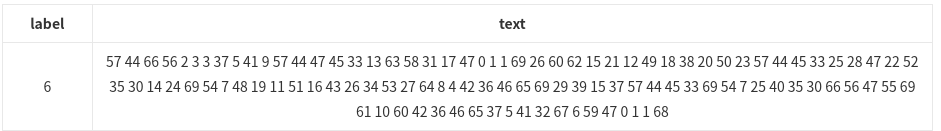
在数据集中标签的对应的关系如下：

```
{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}
```

赛题数据来源为互联网上的新闻，通过收集并匿名处理得到。因此选手可以自行进行数据分析，可以充分发挥自己的特长来完成各种特征工程，不限制使用任何外部数据和模型。

数据列使用\t进行分割，Pandas读取数据的代码如下：
```
train_df = pd.read_csv('../input/train_set.csv', sep='\t')
```

### 二、评测标准
评价标准为类别f1_score的均值，选手提交结果与实际测试集的类别进行对比，结果越大越好
$$
计算公式： F1 = 2*\frac{(precision*recall)}{precision+recall}
$$
```
from sklearn.metrics import f1_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
f1_score(y_true, y_pred, average='macro')
```

# 解题
典型的字符识别问题

## 1.赛题理解

### 1.1 数据读取
使用Pandas库完成数据读取操作，并对赛题数据进行分析。
###  1.2 解题思路
赛题思路分析：赛题本质是一个文本分类问题，需要根据每句的字符进行分类。但赛题给出的数据是匿名化的，不能直接使用中文分词等操作，这个是赛题的难点： **对匿名字符进行建模，进而完成文本分类**

由于文本数据是一种典型的非结构化数据，因此可能涉及到**特征提取**和**分类模型**两个部分。

- 思路1：TF-IDF + 机器学习分类器

直接使用TF-IDF对文本提取特征，并使用分类器进行分类。在分类器的选择上，可以使用SVM、LR、或者XGBoost。

- 思路2：FastText

FastText是入门款的词向量，利用Facebook提供的FastText工具，可以快速构建出分类器。

- 思路3：WordVec + 深度学习分类器

WordVec是进阶款的词向量，并通过构建深度学习分类完成分类。深度学习分类的网络结构可以选择TextCNN、TextRNN或者BiLSTM。

- 思路4：Bert词向量

Bert是高配款的词向量，具有强大的建模学习能力。




## 2. 数据读取与数据分析
- 学习使用Pandas读取赛题数据
- 分析赛题数据的分布规律

### 数据读取

In [2]:
import pandas as pd
train_df = pd.read_csv('./data/train_set.csv', sep='\t', nrows=100) # 数据集比较大，读取行数先设置为100
train_df.head()

,"file,description,size,link"
0,"train_set.csv.zip,ѵ�������ݣ�ѡ����Ҫ���н�ѹ��,236..."
1,"test_a.csv.zip,���Լ�A�����ݣ�ѡ����Ҫ���н�ѹ��,59...."
2,"test_a_sample_submit.csv,���Լ�A���ύ����,97.66K..."
